## Instantiate client

In [76]:
from matplotlib import pyplot as plt
import json
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import stumpy
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import urllib
import ssl
import io
import os

In [75]:
! pip install STUMPY

     |████████████████████████████████| 61 kB 134 kB/s eta 0:00:01


! pip install git+https://7ccffead3063519ac2d3c5fc9c46ef4ba7691143@github.com/nadavk72/kando-python-client.git

In [2]:
def create_heat_map(data):
    """
    :param data: data set
    plot a heatmap of correlation between the features
    """

    plt.figure(figsize=(10, 10))

    mask = np.tril(np.ones_like(data.corr(), dtype=np.bool))
    ax = sns.heatmap(data.corr(),
                     annot=True,
                     fmt=".2f",
                     mask=mask,
                     square=True,
                     linecolor='white',
                     linewidths=1)
    if data.shape[1] > 10:
        plt.xticks(rotation=55)
        plt.yticks(rotation=0)

    plt.title('\nFeatures Correlation', fontsize=18)

In [3]:
from kando import kando_client

In [4]:
key = '7aa093814417ff79f6c21237af123a899cb2a43c55eeabf1098fac8ecc26a2e7'
secret = 'b99991090b60f6e41eaa0315ecc1a54a80a7a6b06002f356cb65d2d284585ff9'

with open('key.json') as f:
    api_login = json.load(f)

url = "https://kando-staging.herokuapp.com"
client = kando_client.client(url, api_login['key'], api_login['secret'])

In [5]:
url = "https://kando-staging.herokuapp.com"
client = kando_client.client(url, key, secret)

## Load data

In [6]:
df_Train = client.get_all(point_id=1378, start=2020)

Kando - GET /api/data/fetch?point_id=1378&unit_id=&start=2020&end=&raw_data=
Kando - GET /api/data/fetch?point_id=1378&unit_id=&start=1503023700&end=&raw_data=
Kando - GET /api/data/fetch?point_id=1378&unit_id=&start=1506582000&end=&raw_data=


In [7]:
df_Train

{'has_more': False,
 'fetch_size': 0,
 'last_sampling': None,
 'last_sampling_formated': None,
 'point_id': 1378,
 'point': {'id': 1378,
  'name': 'לונץ',
  'device': {'unit_id': None, 'wl_installation_height': 0.0},
  'pipe_info': {'channel_shape': 'circular_pipe',
   'diameter': 0.0,
   'pipe_width': 0.0,
   'pipe_slope': 0.0,
   'pipe_friction': 0.0125634},
  'group': {'name': 'לונץ',
   'type': 'groups/factory',
   'water_consumption': 0.0,
   'percentage_water_in_sewage': 70.0,
   'background_water_ec': None,
   'water_authority': {'id': 24, 'name': 'הגיחון'},
   'sector': {'id': 39, 'name': 'Industrial Main Collector**'}},
  'time_zone': 'Asia/Jerusalem',
  'latitude': 31.782423,
  'longitude': 35.21898},
 'samplings': {'1483506780': {'DateTime': 1483506780,
   'PI': 51.1647619047619,
   'EC': 760,
   'PH': 4.8,
   'WL': 0,
   'ORP': -331,
   'TEMPERATURE': 25,
   'visit': True,
   'Battery': 3553,
   'Signal': 29},
  '1492686300': {'DateTime': 1492686300,
   'PI': 0.0,
   'EC': 

In [8]:
samples = df_Train['samplings']
len(samples)

36861

In [34]:
df = pd.DataFrame.from_dict(samples, orient='index')
df.drop(['1483506780'], inplace=True)
df.drop(['visit', 'Battery', 'Signal'], axis=1)

,DateTime,PI,EC,PH,WL,ORP,TEMPERATURE
1492686300,1492686300,0.000000,0,7.2,0,-5,32
1492686600,1492686600,0.000000,0,7.2,0,-5,32
1492686900,1492686900,0.000000,0,7.2,0,-5,32
1492687200,1492687200,0.000000,0,7.2,0,-5,32
1492687500,1492687500,0.000000,0,7.2,0,-5,32
...,...,...,...,...,...,...,...
1506580500,1506580500,34.946667,1240,5.5,0,165,28
1506580800,1506580800,34.612381,1280,5.5,0,188,26
1506581100,1506581100,34.584381,1256,5.5,0,196,26
1506581400,1506581400,34.780000,1240,5.5,0,197,27


In [35]:
df['DateTime'] = df['DateTime'].apply(lambda x: 1000000000*x)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index('DateTime')

In [11]:
df.head(100)

,PI,EC,PH,WL,ORP,TEMPERATURE
DateTime,,,,,,
2017-04-20 11:05:00,0.000000,0.0,7.2,0.0,-5.0,32.0
2017-04-20 11:10:00,0.000000,0.0,7.2,0.0,-5.0,32.0
2017-04-20 11:15:00,0.000000,0.0,7.2,0.0,-5.0,32.0
2017-04-20 11:20:00,0.000000,0.0,7.2,0.0,-5.0,32.0
2017-04-20 11:25:00,0.000000,0.0,7.2,0.0,-5.0,32.0
...,...,...,...,...,...,...
2017-04-20 18:30:00,17.113758,872.0,6.2,0.0,-73.0,24.0
2017-04-20 18:35:00,17.064806,1032.0,6.2,0.0,-63.0,23.0
2017-04-20 18:40:00,17.167473,1120.0,6.2,0.0,-114.0,23.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36860 entries, 2017-04-20 11:05:00 to 2017-09-28 06:55:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PI           36860 non-null  float64
 1   EC           36860 non-null  float64
 2   PH           36860 non-null  float64
 3   WL           36860 non-null  float64
 4   ORP          36860 non-null  float64
 5   TEMPERATURE  36860 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB


In [68]:
data_dic = {
    'PI': 'Polution_Index ',
    'EC': 'Electrical_Conductivity',
    'PH': 'pH',
    'WL': 'Water_Level',
    'ORP': 'Oxidation_reduction_potential',
    'TEMPERATURE': 'Temperature',
    'COD': 'Chemical_Oxygen_Demand',
    'TSS': 'Total_suspended_solids',
    'FLOW': 'Flow',
    'Battery': 'Battery_Level',
    'Signal': 'Signal',
    'MS': 'MS',
    'gaps': 'gaps'
}

In [14]:
df.describe()

,PI,EC,PH,WL,ORP,TEMPERATURE
count,36860.000000,36860.000000,36860.000000,36860.0,36860.000000,36860.000000
mean,37.217832,1248.420184,5.437037,0.0,-206.802794,27.977591
std,12.740167,415.523129,0.584569,0.0,174.919587,1.643169
min,0.000000,0.000000,0.000000,0.0,-498.000000,0.000000
25%,30.945333,1096.000000,5.000000,0.0,-375.000000,27.000000
50%,41.179937,1280.000000,5.300000,0.0,-208.000000,28.000000
75%,47.788889,1432.000000,5.600000,0.0,-104.000000,29.000000
max,65.602095,9984.000000,11.600000,0.0,565.000000,35.000000


In [15]:
df.nunique()

PI             6121
EC              317
PH               49
WL                1
ORP             733
TEMPERATURE      18
dtype: int64

In [16]:
df.isna().sum()

PI             0
EC             0
PH             0
WL             0
ORP            0
TEMPERATURE    0
dtype: int64

In [17]:
df.columns

Index(['PI', 'EC', 'PH', 'WL', 'ORP', 'TEMPERATURE'], dtype='object')

In [18]:
cols_to_plot = ['PI', 'EC', 'PH', 'ORP', 'TEMPERATURE']

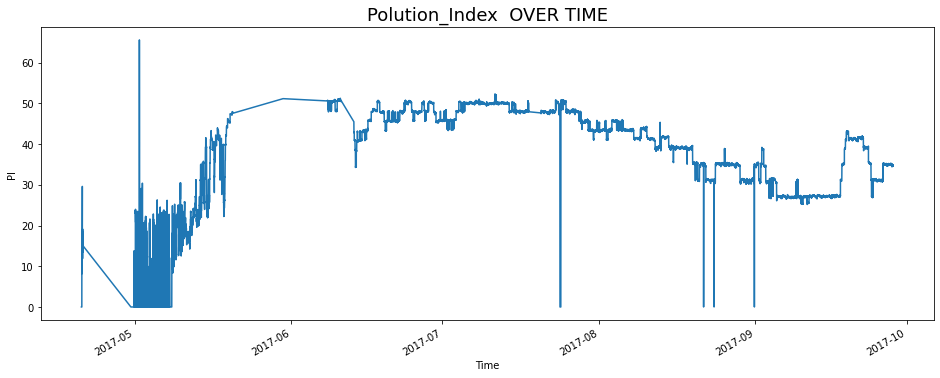

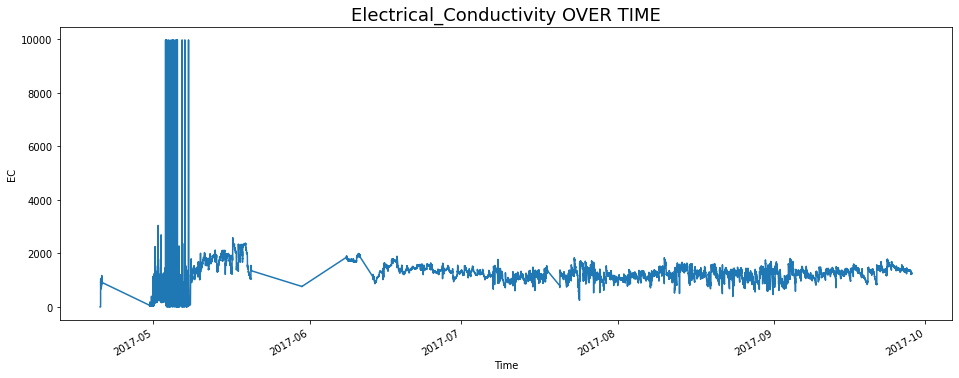

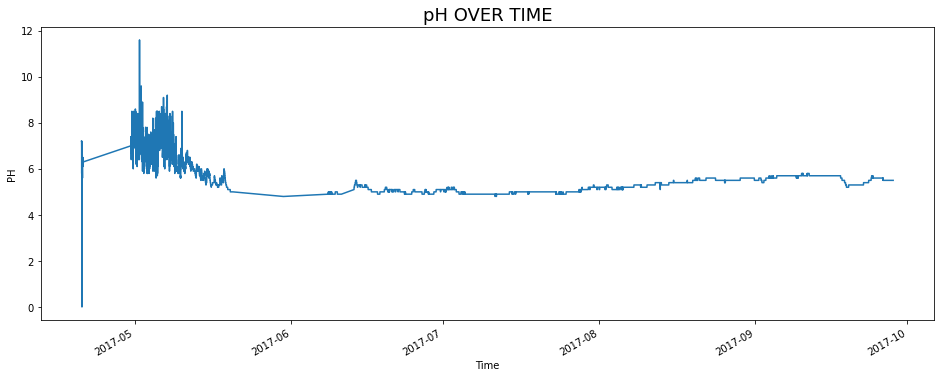

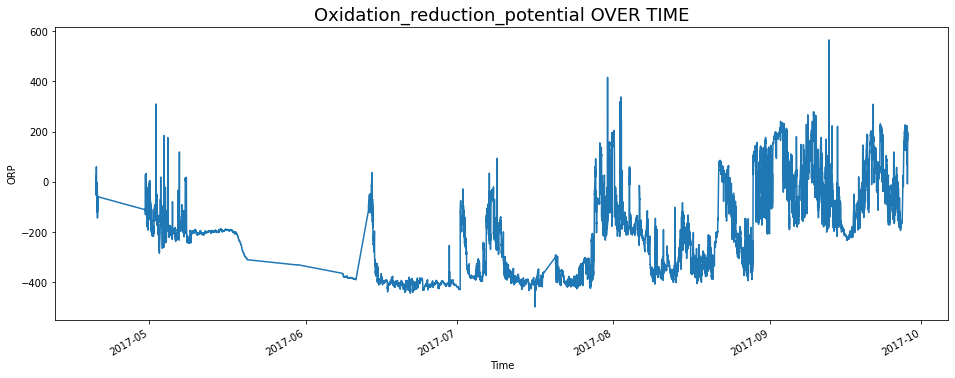

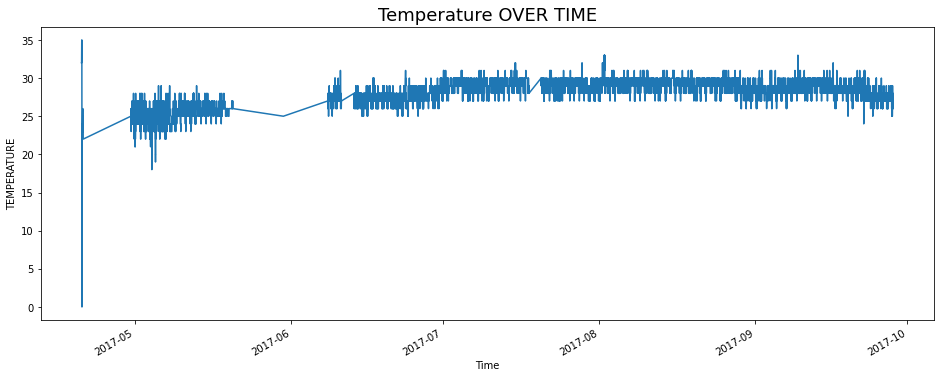

In [47]:
for col_ in cols_to_plot:
    plt.figure(figsize=(16, 6))
    df[f'{col_}'].plot()
    plt.title(data_dic[f'{col_}']+ ' OVER TIME', fontsize=18)
    plt.xlabel('Time')
    plt.ylabel(str(col_))
    plt.show()

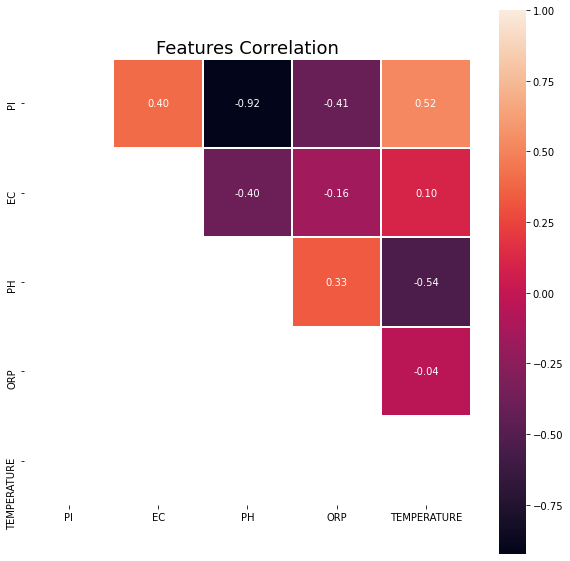

In [20]:
create_heat_map(df[cols_to_plot])

In [21]:
df.index = pd.to_datetime(df.index)

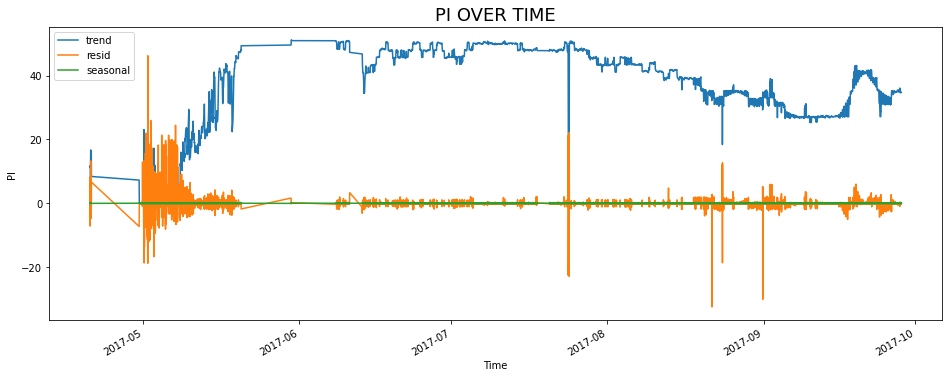

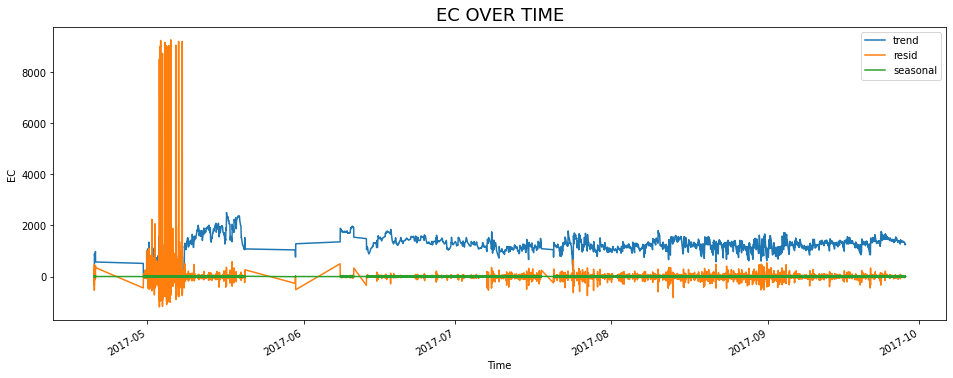

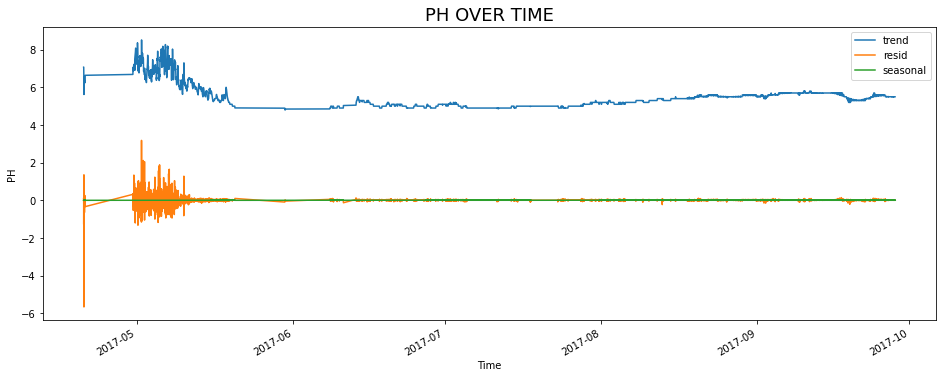

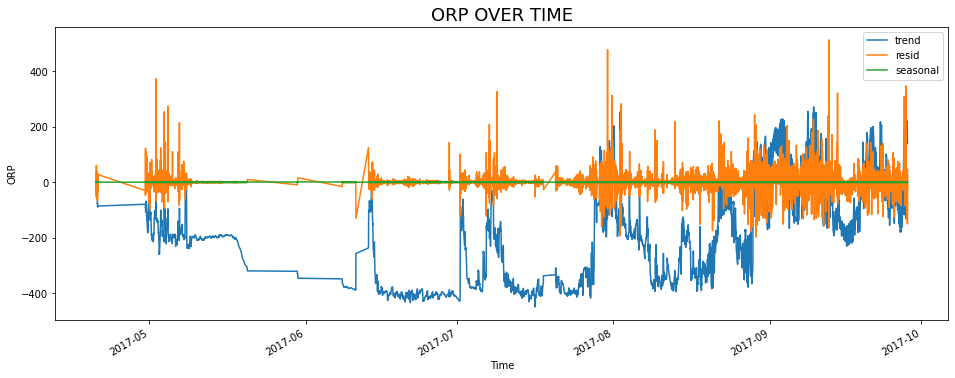

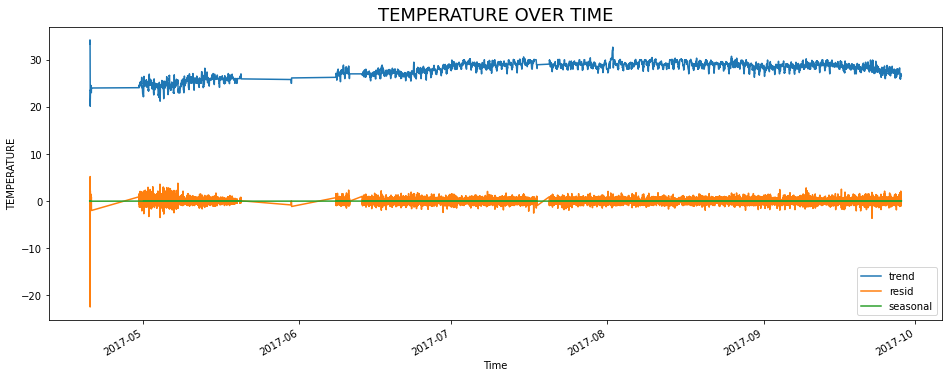

In [22]:
for col_ in cols_to_plot:
    try:
        decomposed = seasonal_decompose(df[f'{col_}'], period = 15)
        plt.figure(figsize=(16, 6))
        decomposed.trend.plot()
        decomposed.resid.plot()
        decomposed.seasonal.plot()
        plt.legend()
        plt.title(str(col_)+ ' OVER TIME', fontsize=18)
        plt.xlabel('Time')
        plt.ylabel(str(col_))
        plt.show()
    except:
        print('too much nan values in', col_)

In [39]:
BH_data = pd.read_csv('sorek.csv', index_col=0)

In [42]:
BH_data.head()

,PI,EC,PH,COD,ORP,TSS,FLOW,TEMPERATURE,Battery,Signal,visit,sampler,WL,MS,BOD,gaps
2020-04-13 21:15:00,17.786276,984.0,7.542,961.0,-448.0,146.0,-8191.75,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-13 21:30:00,18.045789,976.0,7.544,1080.0,-448.0,178.0,-8191.75,21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000069
2020-04-13 21:45:00,18.045234,976.0,7.560,896.0,-449.0,118.0,-8191.75,21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000069
2020-04-13 22:00:00,17.844817,968.0,7.551,896.0,-449.0,115.0,-8191.75,21.2,0.0,13.0,NaN,NaN,NaN,NaN,NaN,0.000069
2020-04-13 22:15:00,18.126484,968.0,7.566,874.0,-449.0,133.0,-8191.75,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000069


In [50]:
BH_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14032 entries, 2020-04-13 21:15:00 to 2020-10-10 21:00:00
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PI           14032 non-null  float64
 1   EC           14032 non-null  float64
 2   PH           14032 non-null  float64
 3   COD          14032 non-null  float64
 4   ORP          14030 non-null  float64
 5   TSS          14024 non-null  float64
 6   FLOW         10674 non-null  float64
 7   TEMPERATURE  14032 non-null  float64
 8   Battery      3654 non-null   float64
 9   Signal       3654 non-null   float64
 10  visit        49 non-null     object 
 11  sampler      6 non-null      object 
 12  WL           1 non-null      float64
 13  MS           6769 non-null   float64
 14  BOD          1 non-null      float64
 15  gaps         14031 non-null  float64
dtypes: float64(14), object(2)
memory usage: 1.8+ MB


In [65]:
BH_data.nunique()

PI             13600
EC               186
PH              1583
COD             1387
ORP              499
TSS              740
FLOW             396
TEMPERATURE      121
Battery            6
Signal            10
visit              1
sampler            1
WL                 1
MS              3316
BOD                1
gaps              38
dtype: int64

In [58]:
for col in BH_data.columns:
    print(BH_data[f'{col}'].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object
float64
float64
float64
float64


In [63]:
cols_to_plot = [
    col for col in BH_data.columns
    if (BH_data[f'{col}'].dtype == 'float64') and (
        BH_data[f'{col}'].nunique() > 1)
]

In [64]:
cols_to_plot

['PI',
 'EC',
 'PH',
 'COD',
 'ORP',
 'TSS',
 'FLOW',
 'TEMPERATURE',
 'Battery',
 'Signal',
 'MS',
 'gaps']

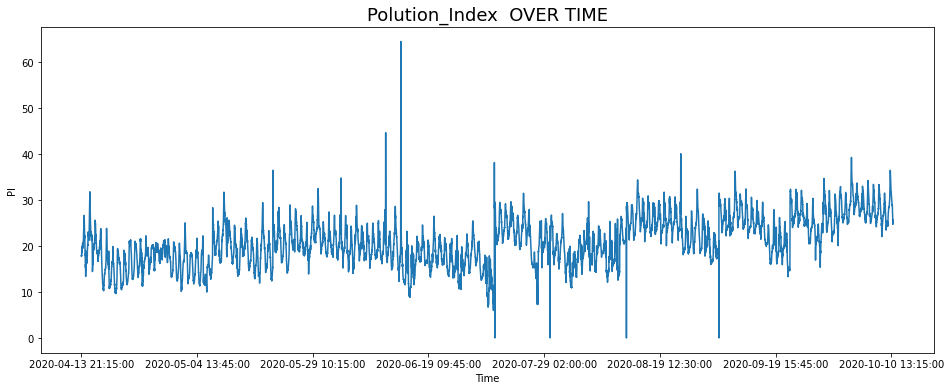

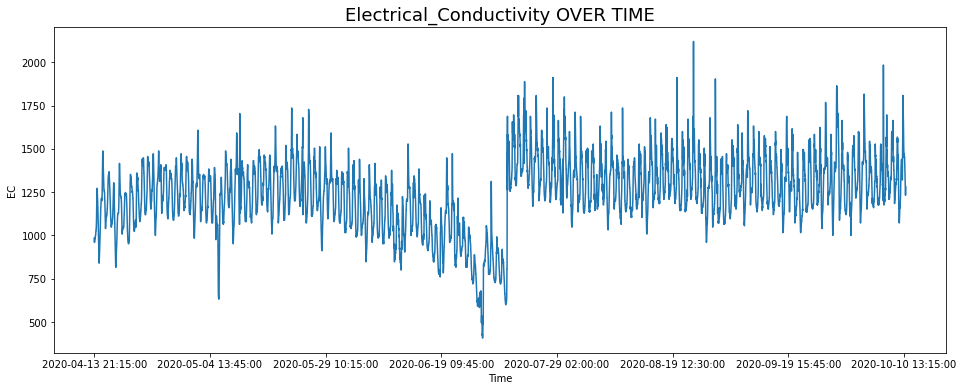

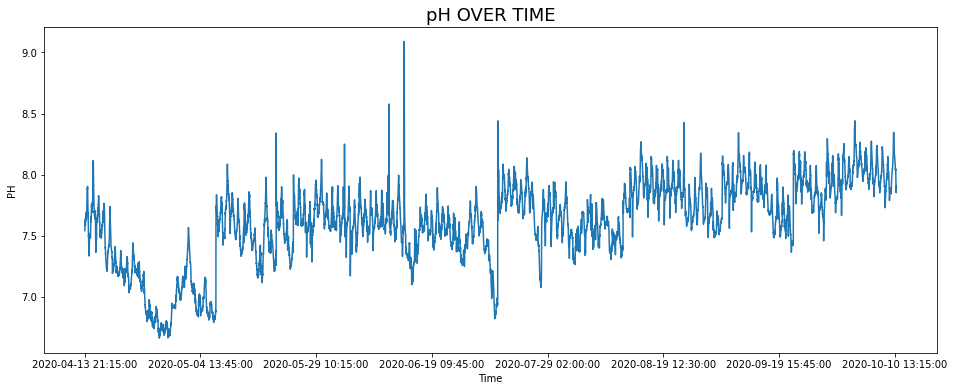

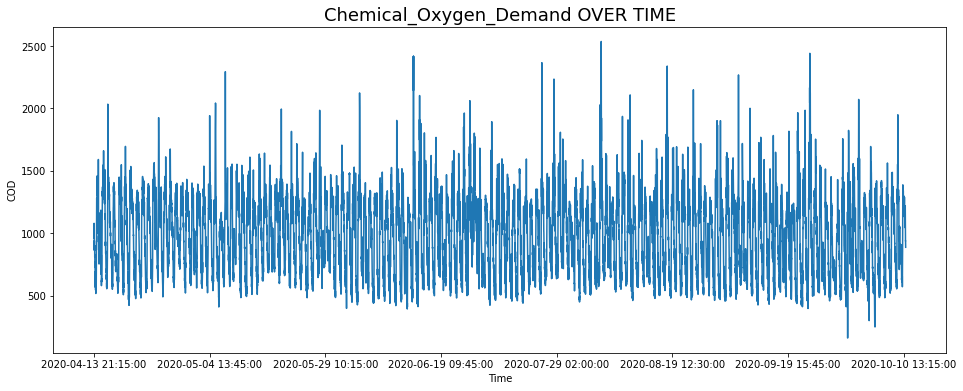

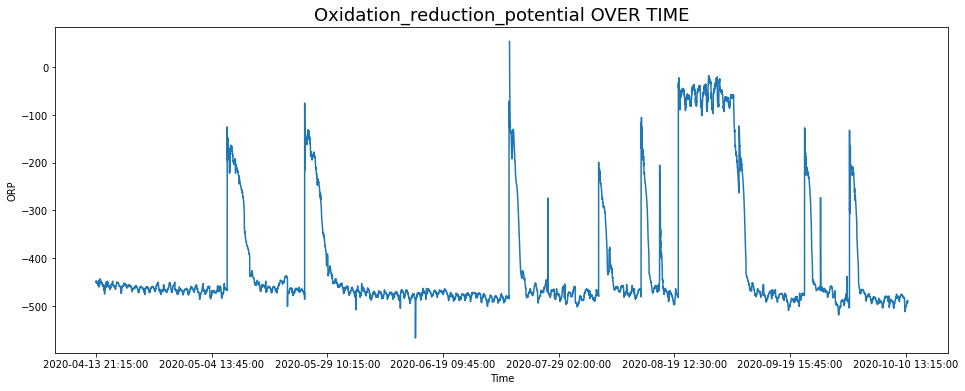

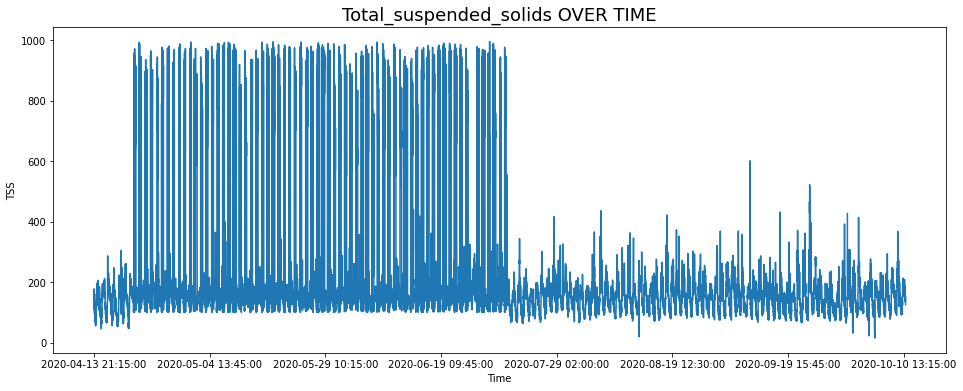

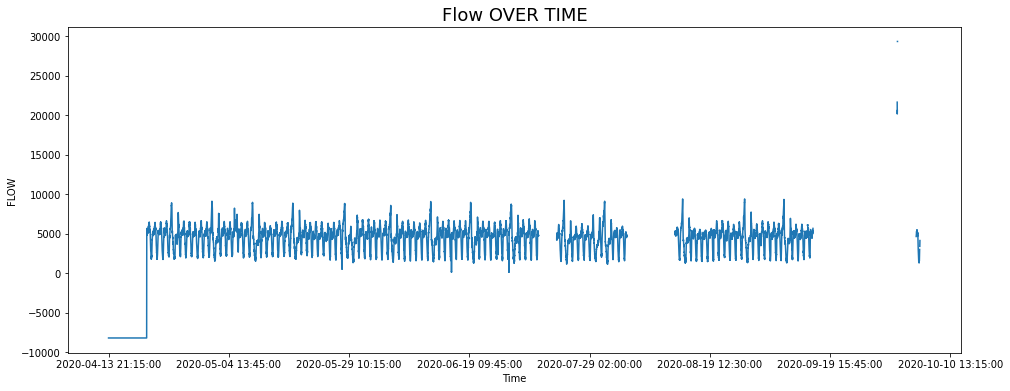

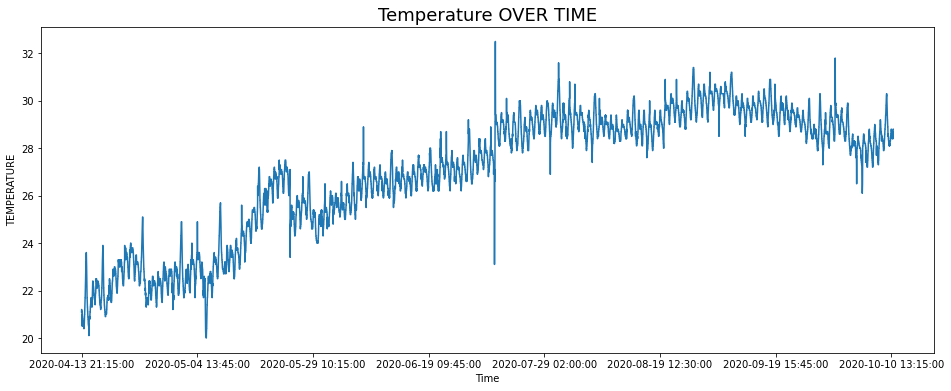

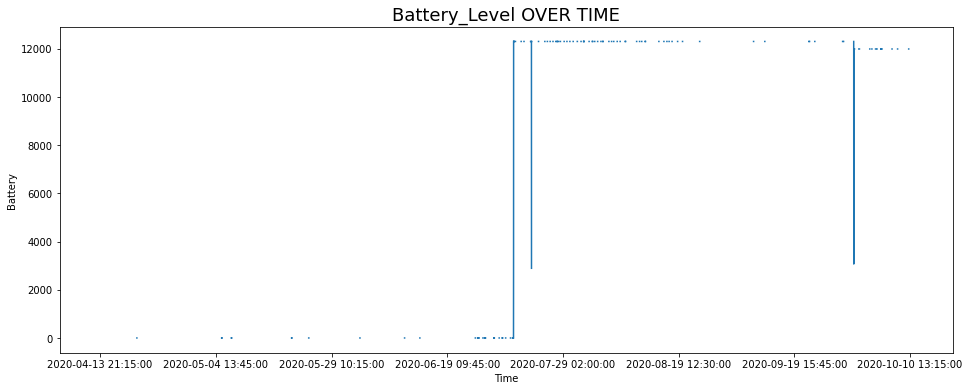

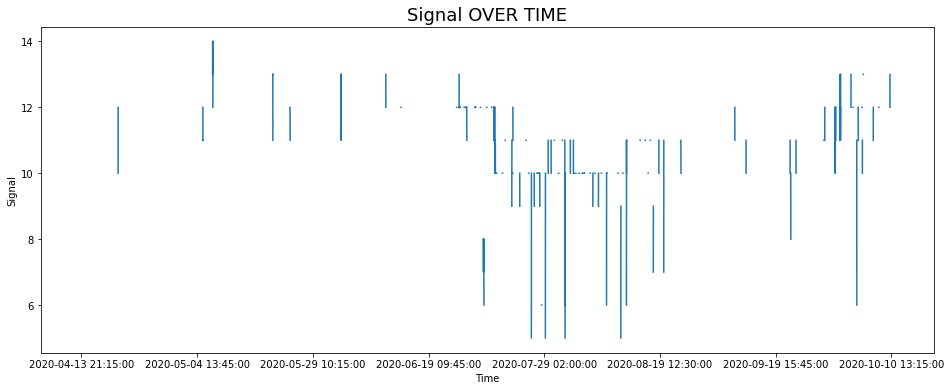

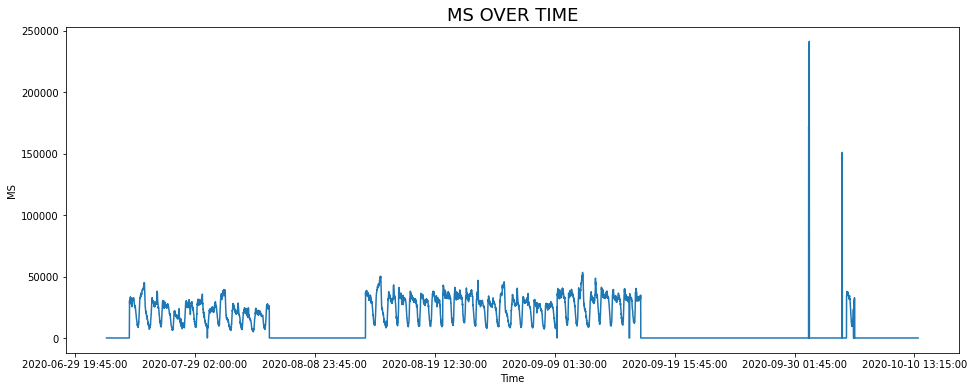

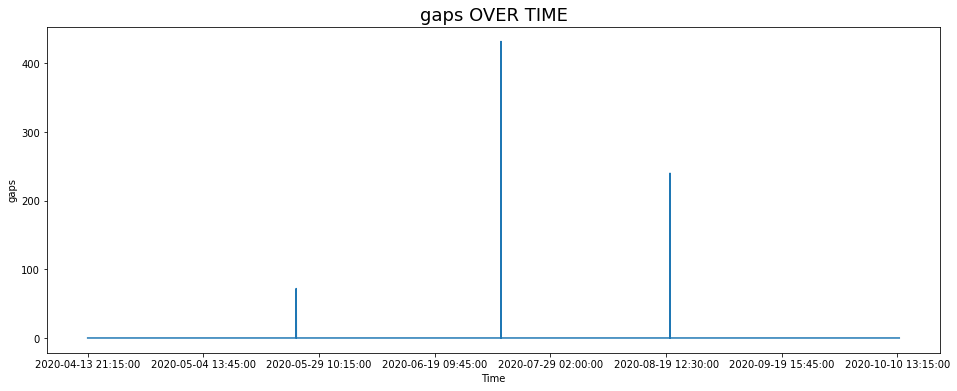

In [69]:
for col_ in cols_to_plot:
    plt.figure(figsize=(16, 6))
    BH_data[f'{col_}'].plot()
    plt.title(data_dic[f'{col_}']+ ' OVER TIME', fontsize=18)
    plt.xlabel('Time')
    plt.ylabel(str(col_))
    plt.show()

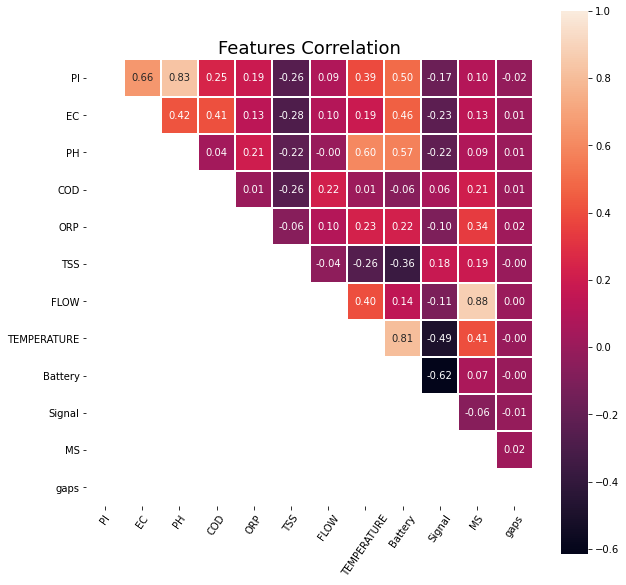

In [71]:
create_heat_map(BH_data[cols_to_plot])

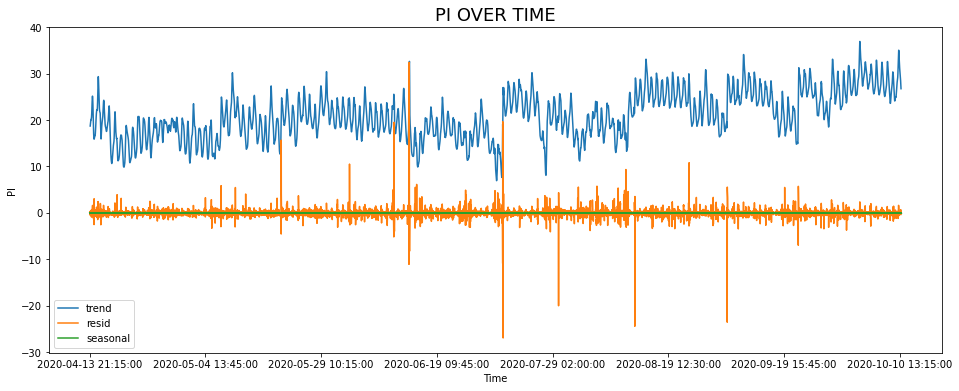

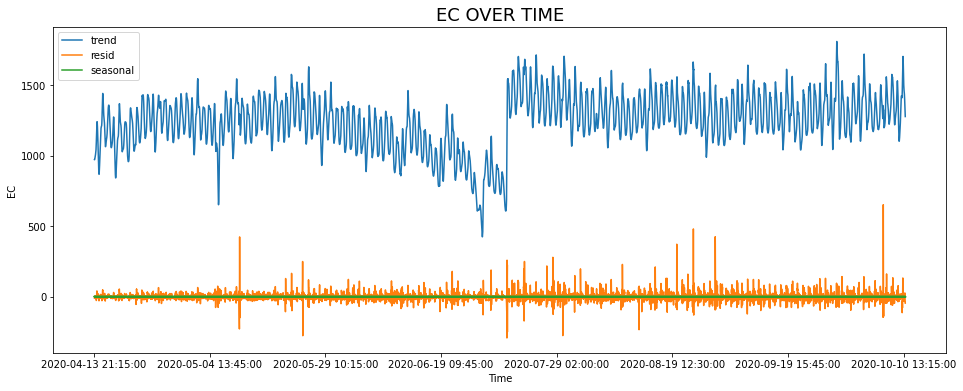

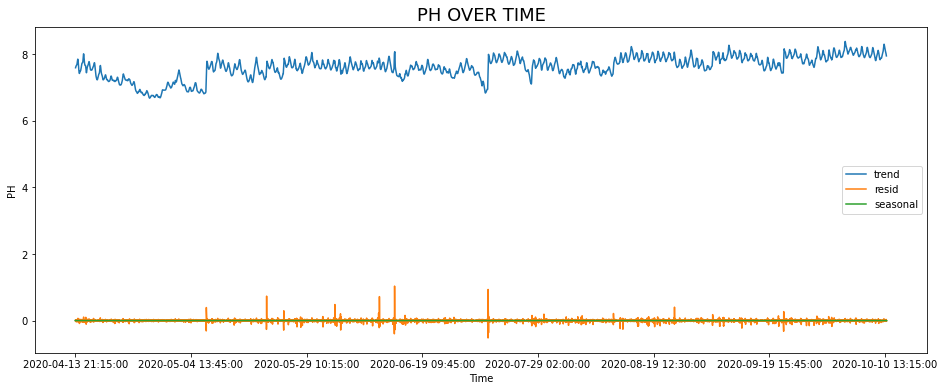

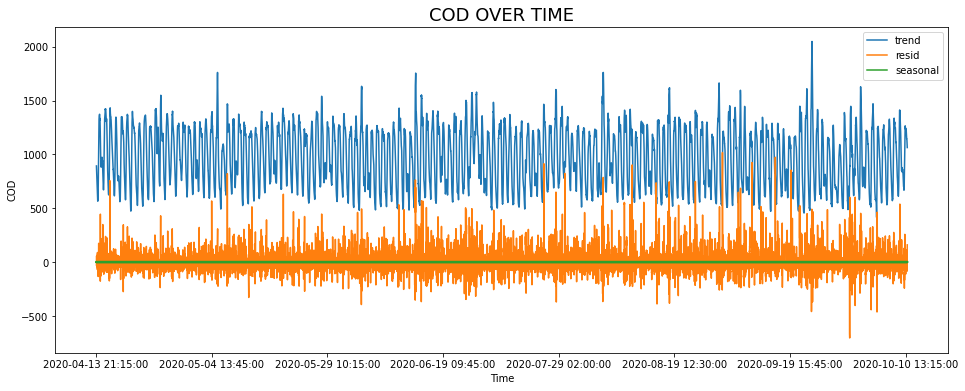

too much nan values in ORP
too much nan values in TSS
too much nan values in FLOW


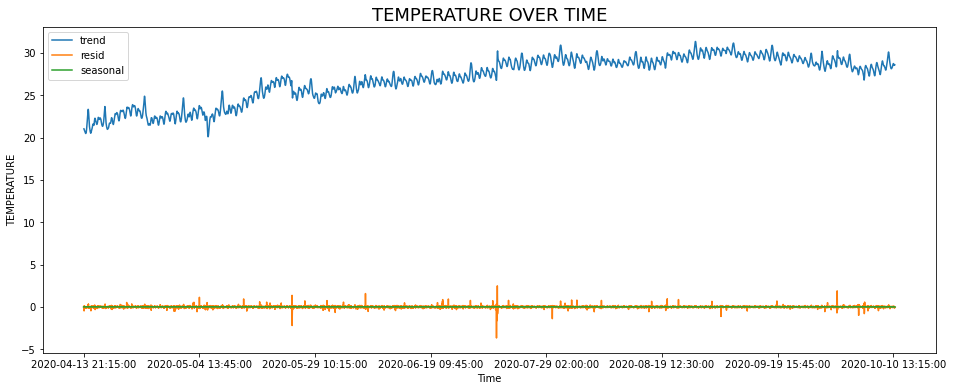

too much nan values in Battery
too much nan values in Signal
too much nan values in MS
too much nan values in gaps


In [70]:
for col_ in cols_to_plot:
    try:
        decomposed = seasonal_decompose(BH_data[f'{col_}'], period = 15)
        plt.figure(figsize=(16, 6))
        decomposed.trend.plot()
        decomposed.resid.plot()
        decomposed.seasonal.plot()
        plt.legend()
        plt.title(str(col_)+ ' OVER TIME', fontsize=18)
        plt.xlabel('Time')
        plt.ylabel(str(col_))
        plt.show()
    except:
        print('too much nan values in', col_)

In [149]:
BH_data[f'PI'].sample(20)

2020-05-18 16:45:00    20.956405
2020-10-02 17:00:00    25.365972
2020-06-11 12:00:00    27.862500
2020-07-26 00:00:00    21.794167
2020-09-23 07:00:00    30.825972
2020-06-26 10:00:00    20.506944
2020-09-02 02:30:00    23.825278
2020-08-08 01:15:00    18.099722
2020-05-26 13:45:00    23.776100
2020-09-20 17:45:00    19.358472
2020-09-26 09:15:00    30.103333
2020-07-19 10:22:00    27.446806
2020-05-03 03:00:00    12.906067
2020-09-30 15:15:00    29.043694
2020-06-22 17:30:00    16.473472
2020-06-28 14:00:00    18.905694
2020-06-23 11:30:00    16.565139
2020-06-29 06:45:00    15.175486
2020-05-09 13:45:00    26.892456
2020-05-16 20:00:00    17.518038
Name: PI, dtype: float64

In [92]:
motif_detection_columns = ['PI', 'EC', 'PH', 'ORP', 'TEMPERATURE']

In [216]:
BH_data[motif_detection_columns]

,PI,EC,PH,ORP,TEMPERATURE
2020-04-13 21:15:00,17.786276,984.0,7.542,-448.0,21.1
2020-04-13 21:30:00,18.045789,976.0,7.544,-448.0,21.2
2020-04-13 21:45:00,18.045234,976.0,7.560,-449.0,21.2
2020-04-13 22:00:00,17.844817,968.0,7.551,-449.0,21.2
2020-04-13 22:15:00,18.126484,968.0,7.566,-449.0,21.1
...,...,...,...,...,...
2020-10-10 20:00:00,24.698488,1240.0,7.852,-490.0,28.4
2020-10-10 20:15:00,25.382975,1248.0,7.891,-488.0,28.7
2020-10-10 20:30:00,25.628590,1256.0,7.902,-491.0,28.8
2020-10-10 20:45:00,25.613933,1264.0,7.903,-491.0,28.8


In [100]:
m = 96
mps = {}
for col_ in motif_detection_columns:
    mps[f'mp_{col_}'] = stumpy.stump(BH_data[f'{col_}'], m=m)

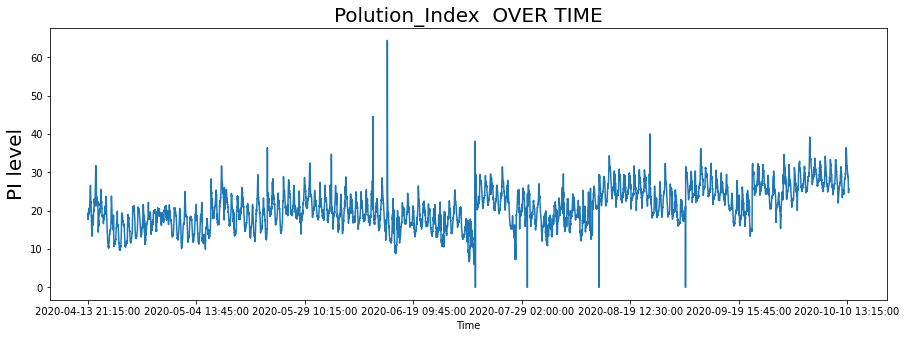

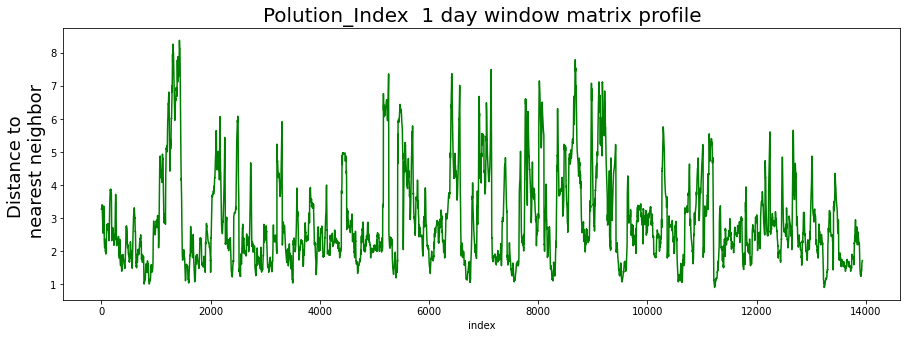

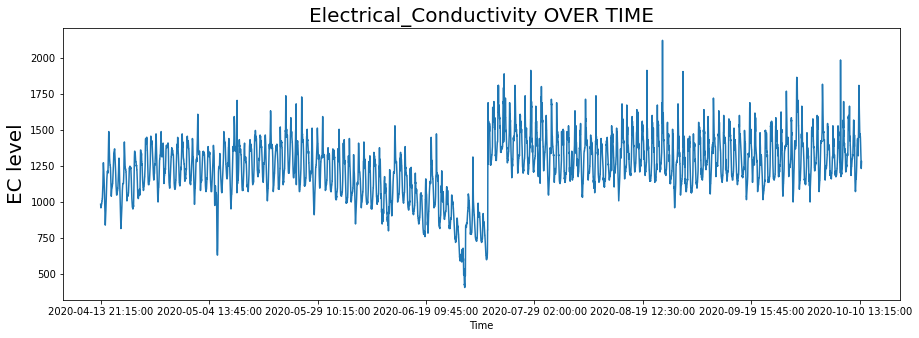

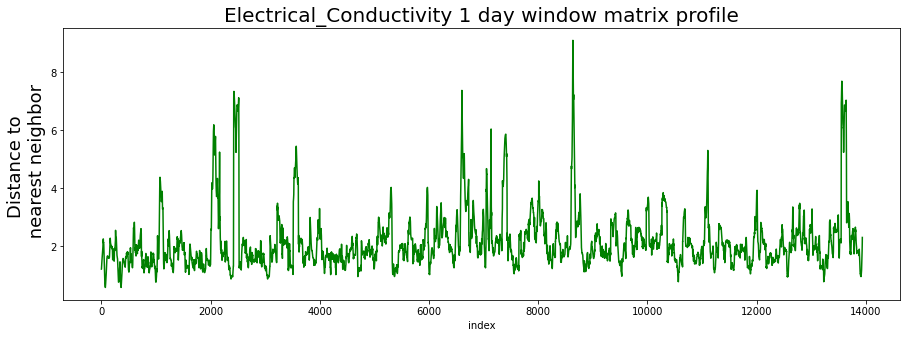

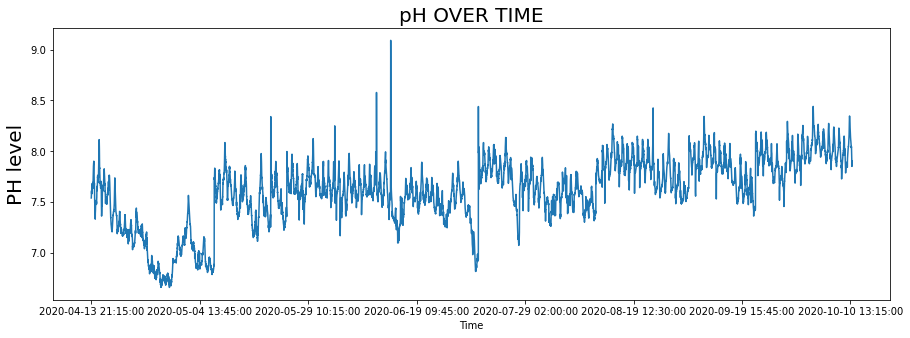

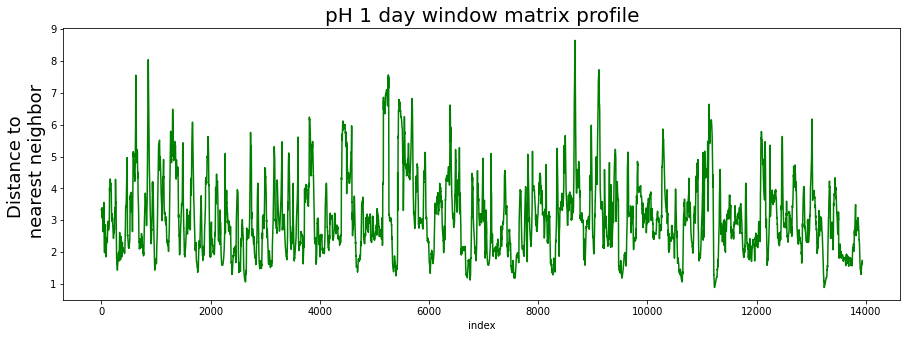

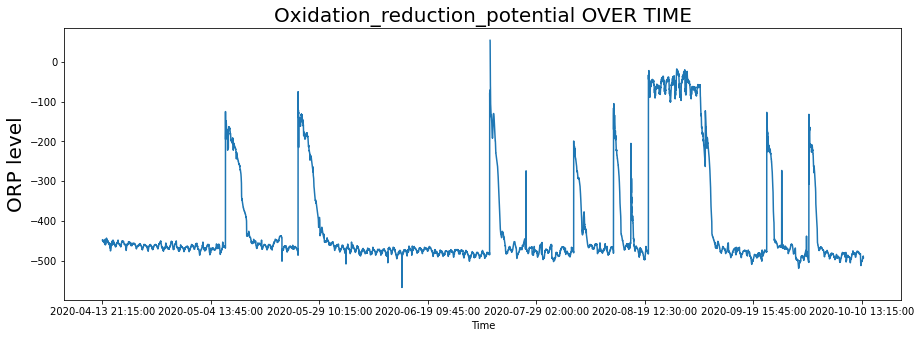

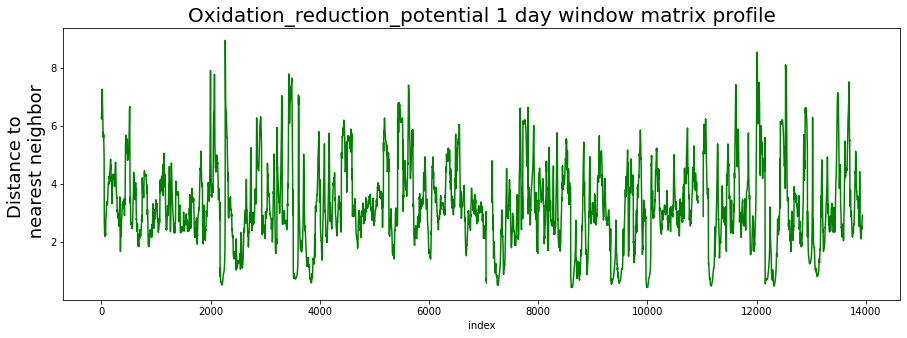

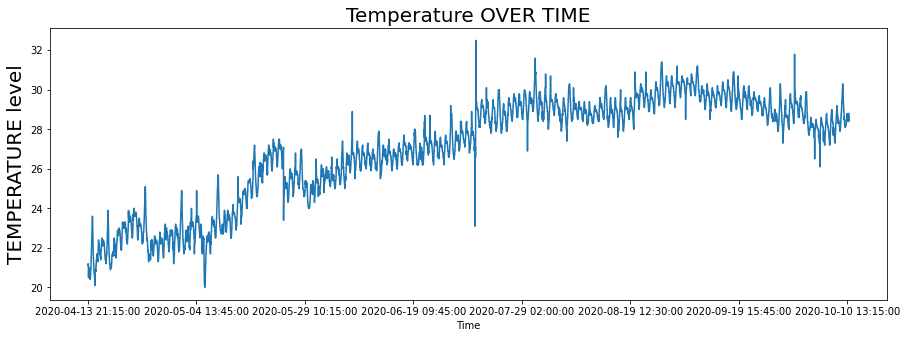

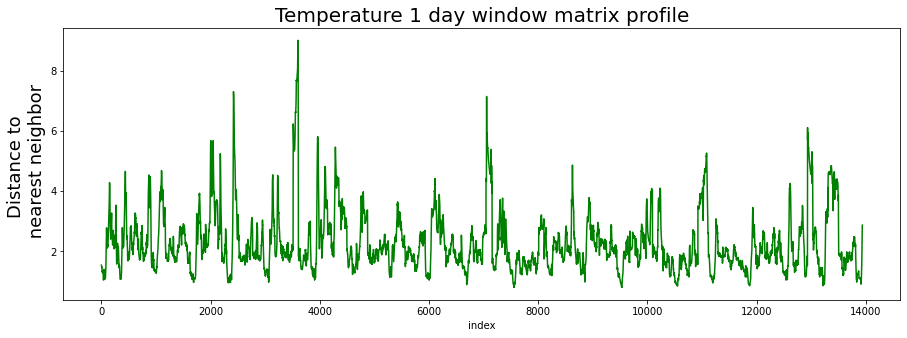

In [253]:
for col_ in motif_detection_columns:
    plt.figure(figsize=(15, 5))
    BH_data[f'{col_}'].plot()
    plt.title(data_dic[f'{col_}']+ ' OVER TIME', fontsize=20)
    plt.xlabel('Time')
    plt.ylabel(f'{col_} level', fontsize='20')   
    plt.show()
    plt.figure(figsize=(15, 5))
    plt.plot(mps[f'mp_{col_}'][:, 0], C='g')
    plt.title(data_dic[f'{col_}']+ ' 1 day window matrix profile', fontsize=20)
    plt.xlabel('index')
    plt.ylabel(f'Distance to \n nearest neighbor', fontsize='18')   
    plt.show()
    print('\n\n\n')


In [211]:
def find_similars(col):
    min_indices = np.argwhere(mps[f'mp_{col}'][:, 0] == mps[f'mp_{col}'][:, 0].min())
    similars = []
    for index in min_indices:
        a = np.argwhere(mps[f'mp_{col}'][:, 1] == index)
        for i in a:
            similars.append(*i)
    return similars

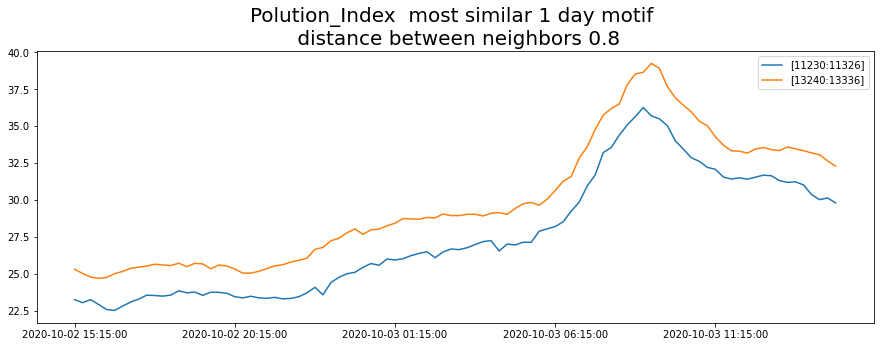

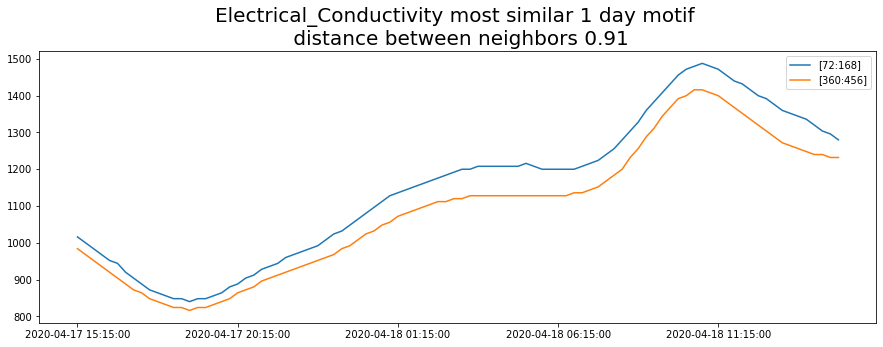

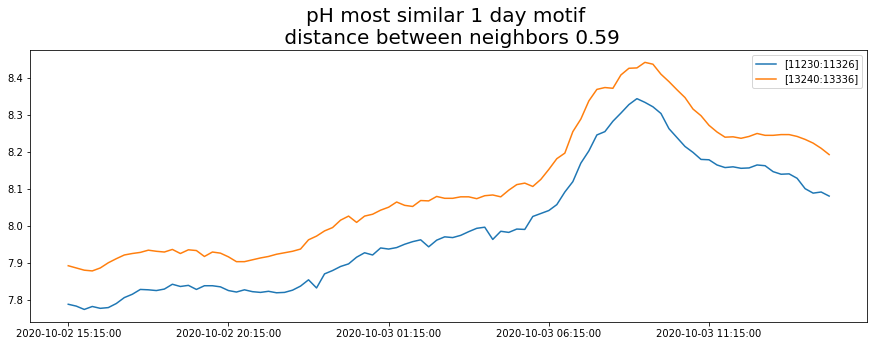

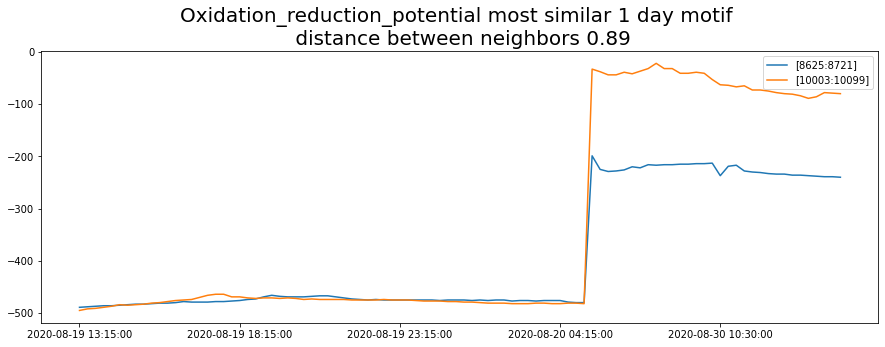

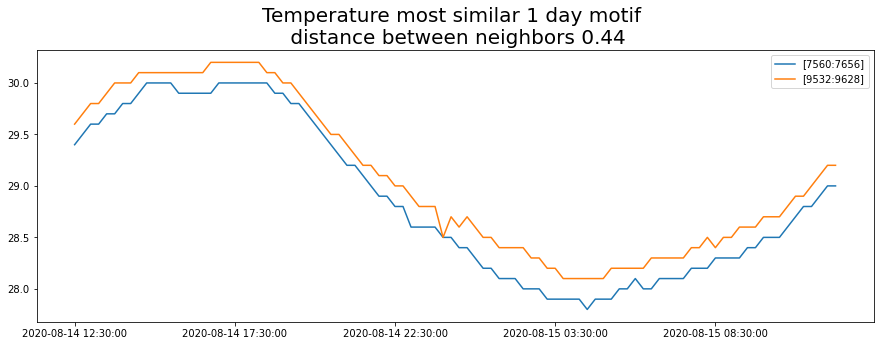

In [254]:
for col_ in motif_detection_columns:
    plt.figure(figsize=(15, 5))
    matrix_profile = mps[f'mp_{col_}'][:, 0]

    plt.title(
        data_dic[f'{col_}'] +
        f' most similar 1 day motif \n distance between neighbors {round(matrix_profile.min(),2)}',
        fontsize=20)
    min_index = np.argwhere(
        matrix_profile == matrix_profile.min()).flatten()[0]
    similar_index = np.argwhere(
        matrix_profile == matrix_profile.min()).flatten()[1]
    motif_1 = BH_data[f'{col_}'][min_index:min_index + m]
    motif_1.plot(label=f'[{min_index}:{min_index+m}]')
    motif_2 = BH_data[f'{col_}'][similar_index:similar_index + m]
    motif_2.plot(label=f'[{similar_index}:{similar_index+m}]')
    plt.legend()
    plt.show()

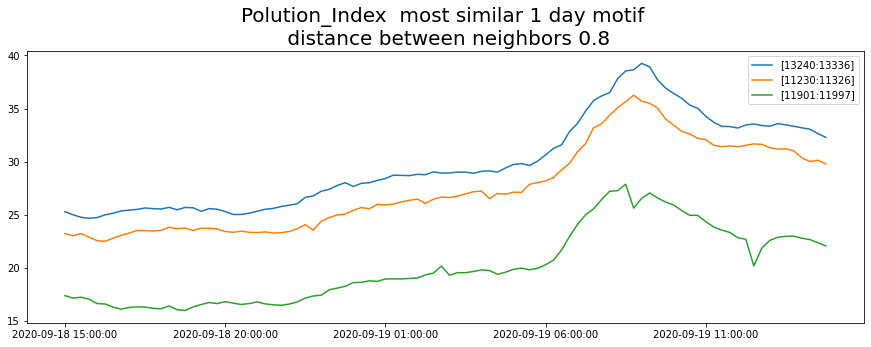

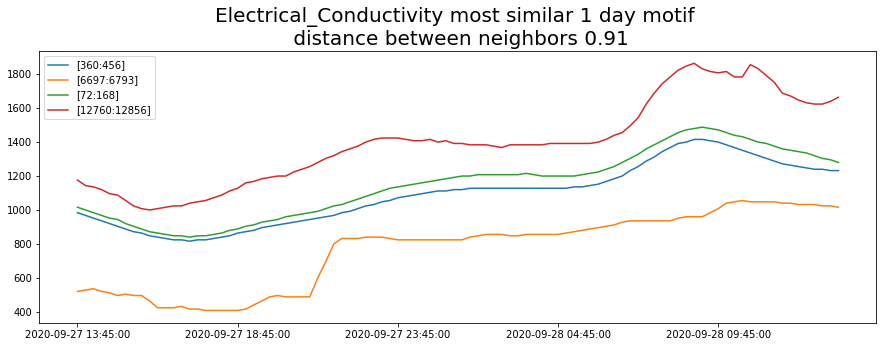

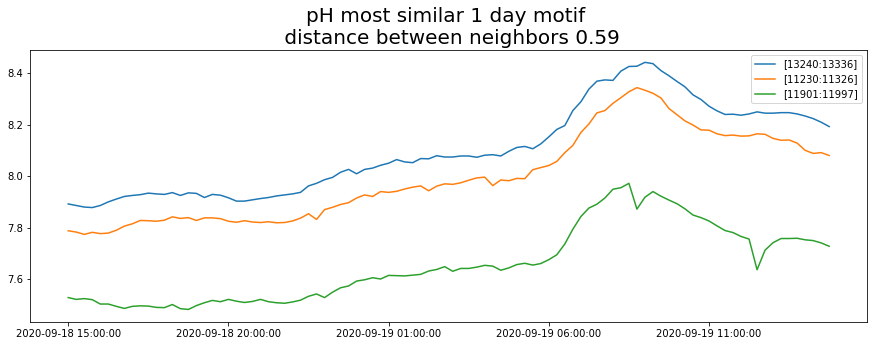

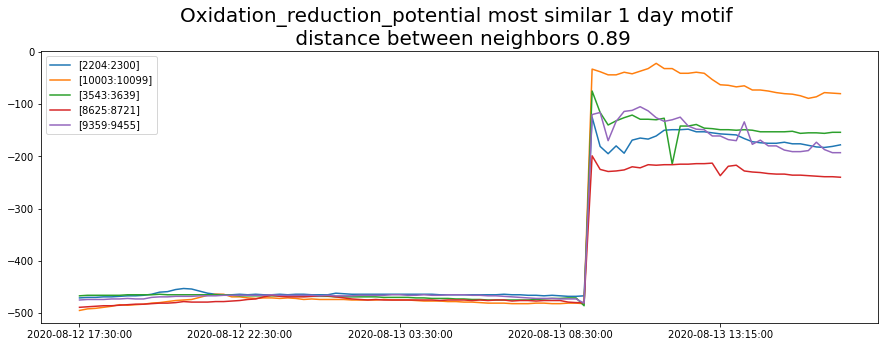

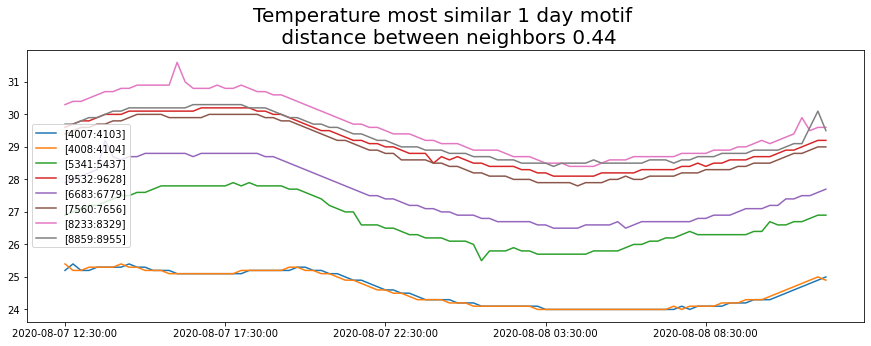

In [214]:
for col_ in motif_detection_columns:
    plt.figure(figsize=(15, 5))
    plt.title(
        data_dic[f'{col_}'] +
        f' most similar 1 day motif \n distance between neighbors {round(matrix_profile.min(),2)}',
        fontsize=20)
    matrix_profile = mps[f'mp_{col_}'][:, 0]
    similars = find_similars(col_)
    for similar in similars:
        motif = BH_data[f'{col_}'][similar:similar + m]
        motif.plot(label=f'[{similar}:{similar+m}]')
    plt.legend()
    plt.show()

In [221]:
motif_detection_columns

['PI', 'EC', 'PH', 'ORP', 'TEMPERATURE']

In [224]:
BH_data[['EC', 'PH']]

,EC,PH
2020-04-13 21:15:00,984.0,7.542
2020-04-13 21:30:00,976.0,7.544
2020-04-13 21:45:00,976.0,7.560
2020-04-13 22:00:00,968.0,7.551
2020-04-13 22:15:00,968.0,7.566
...,...,...
2020-10-10 20:00:00,1240.0,7.852
2020-10-10 20:15:00,1248.0,7.891
2020-10-10 20:30:00,1256.0,7.902
2020-10-10 20:45:00,1264.0,7.903


In [227]:
multi_dimensional = stumpy.mstump(BH_data[['EC', 'PH', 'ORP', 'TEMPERATURE']], 96)

In [248]:
multi_dimensional[0].shape

(13937, 4)

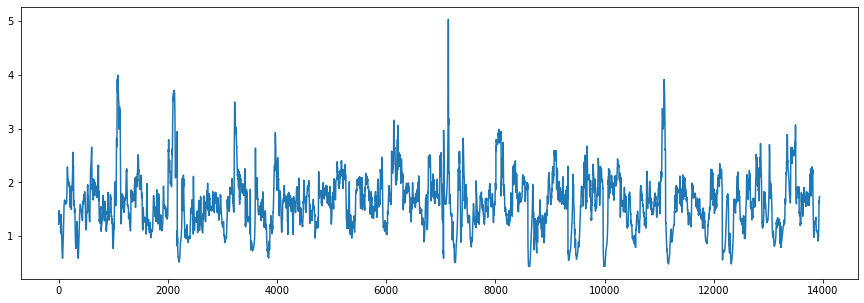

In [260]:
plt.figure(figsize=(15, 5))
plt.plot(multi_dimensional[0][:,0])

In [1]:
maxi = np.argwhere(multi_dimensional[0][:,0] == multi_dimensional[0][:,0].min())
maxi[0][0]

NameError: name 'np' is not defined

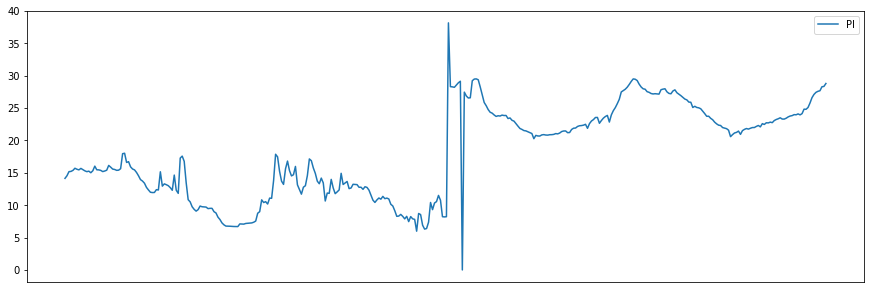

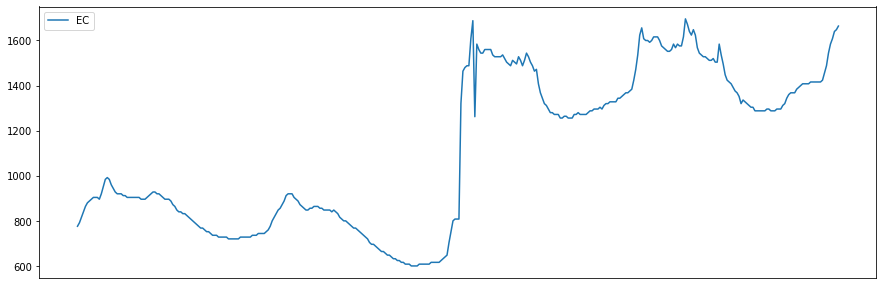

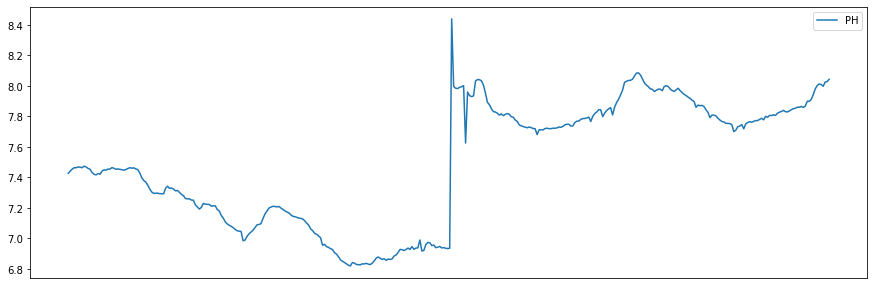

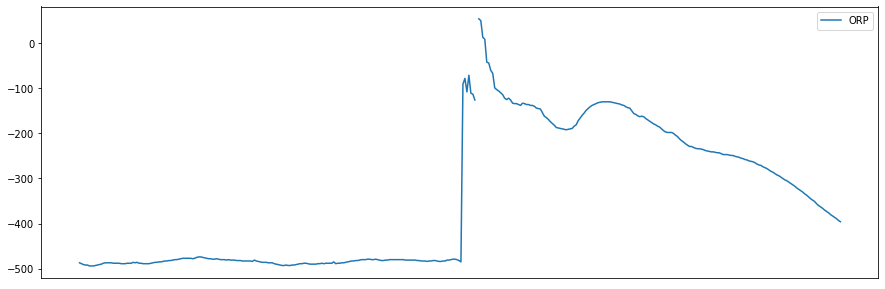

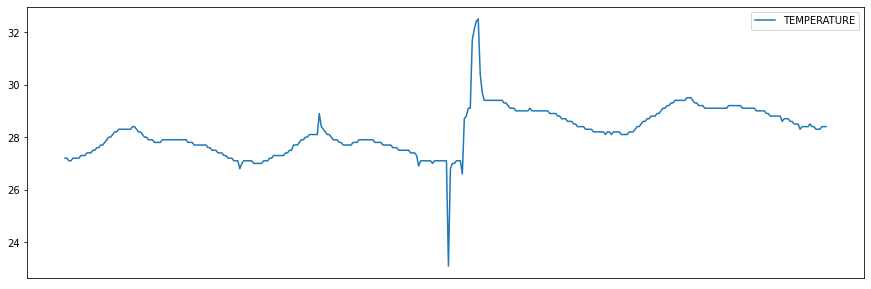

In [298]:
for col in ['PI', 'EC', 'PH', 'ORP', 'TEMPERATURE']:
    plt.figure(figsize=(15, 5))
    plt.plot(BH_data[[f'{col}']][maxi[0][0]-2*m:maxi[0][0]+2*m], label=f'{col}')
    plt.xticks([])
    plt.legend()
    plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.title( 'max', fontsize=20)
matrix_profile = mps[f'mp_{col_}'][:, 0]
similars = find_similars(col_)
for similar in similars:
    motif = BH_data[f'{col_}'][similar:similar + m]
    motif.plot(label=f'[{similar}:{similar+m}]')
plt.legend()
plt.show()

In [301]:
help(client.network_graph)

Help on method network_graph in module kando.kando_client:

network_graph(point_id='') method of kando.kando_client.KandoClient instance



In [300]:
client.network_graph(1378)

Kando - GET /api/data/network_graph?point_id=1378


{'point_id': 1378,
 'point': {'id': 1378,
  'name': 'לונץ',
  'device': {'unit_id': None, 'wl_installation_height': 0.0},
  'pipe_info': {'channel_shape': 'circular_pipe',
   'diameter': 0.0,
   'pipe_width': 0.0,
   'pipe_slope': 0.0,
   'pipe_friction': 0.0125634},
  'group': {'name': 'לונץ',
   'type': 'groups/factory',
   'water_consumption': 0.0,
   'percentage_water_in_sewage': 70.0,
   'background_water_ec': None,
   'water_authority': {'id': 24, 'name': 'הגיחון'},
   'sector': {'id': 39, 'name': 'Industrial Main Collector**'}},
  'time_zone': 'Asia/Jerusalem',
  'latitude': 31.782423,
  'longitude': 35.21898},
 'parent_distance': 31,
 'not_a_suspect': False,
 'children': [],
 'ancestors': [{'point': {'id': 1377,
    'name': 'גיא בן הינום',
    'device': {'unit_id': None, 'wl_installation_height': 0.0},
    'pipe_info': {'channel_shape': 'circular_pipe',
     'diameter': 0.4,
     'pipe_width': 0.0,
     'pipe_slope': 0.0,
     'pipe_friction': 0.0125634},
    'group': {'name': 

In [304]:
client.get_all(point_id=2877)

Kando - GET /api/data/fetch?point_id=2877&unit_id=&start=&end=&raw_data=


Exception: Http error 500. {"error":"API Internal Server Error"}